In [1]:
import pandas as pd
import numpy as np

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
data = pd.read_csv('gbm-data.csv')

In [3]:
X = data.iloc[:,1:1777].values
y = data.iloc[:,0].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
- Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
- Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def transform(y_pred):
    for i in range(len(y_pred)):
        y_pred[i] = 1. / (1 + np.exp(-y_pred[i])) 
    return y_pred

def loss(clf, X, y):
    result=[]
    for i, y_pred in enumerate(clf.staged_decision_function(X)):
        result.append(log_loss(y, [transform(pred) for pred in y_pred]))
    return result

def plot_clf(learning_rate ,test_loss, train_loss):
    plt.figure()
    plt.title('Learning rate= '+str(learning_rate))
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

learning_rate =  1 

      Iter       Train Loss   Remaining Time 
         1           1.0190           15.69s
         2           0.9192           15.13s
         3           0.8272           14.33s
         4           0.7834           13.65s
         5           0.7109           13.82s
         6           0.6368           14.23s
         7           0.5797           14.09s
         8           0.5610           13.49s
         9           0.5185           13.34s
        10           0.4984           12.91s
        20           0.1999           11.95s
        30           0.1313           11.01s
        40           0.0790           10.65s
        50           0.0511            9.99s
        60           0.0352            9.33s
        70           0.0245            8.74s
        80           0.0162            8.17s
        90           0.0114            7.63s
       100           0.0077            7.14s
       200           0.0004            2.22s


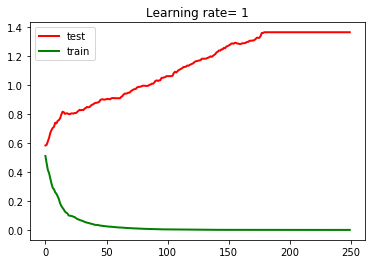

Min metric value= 0.582294259428 

Min metric index= 0 

learning_rate =  0.5 

      Iter       Train Loss   Remaining Time 
         1           1.1255            9.71s
         2           1.0035           12.65s
         3           0.9386           14.41s
         4           0.8844           15.44s
         5           0.8381           15.63s
         6           0.7995           15.90s
         7           0.7559           16.21s
         8           0.7205           16.30s
         9           0.6958           16.15s
        10           0.6725           16.49s
        20           0.4672           15.35s
        30           0.3179           14.36s
        40           0.2274           13.51s
        50           0.1774           12.56s
        60           0.1394           11.52s
        70           0.1050           10.98s
        80           0.0805           10.10s
        90           0.0650            9.25s
       100           0.0511            8.57s
       200         

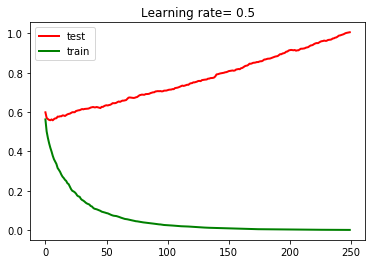

Min metric value= 0.558202552316 

Min metric index= 6 

learning_rate =  0.3 

      Iter       Train Loss   Remaining Time 
         1           1.2095           16.93s
         2           1.1006           17.86s
         3           1.0240           16.80s
         4           0.9729           15.99s
         5           0.9387           15.29s
         6           0.8948           15.94s
         7           0.8621           15.69s
         8           0.8360           15.12s
         9           0.8171           14.62s
        10           0.7883           14.16s
        20           0.6164           12.33s
        30           0.4933           11.44s
        40           0.4248           11.28s
        50           0.3345           10.70s
        60           0.2760            9.98s
        70           0.2263            9.51s
        80           0.1971            9.21s
        90           0.1693            8.66s
       100           0.1388            8.11s
       200         

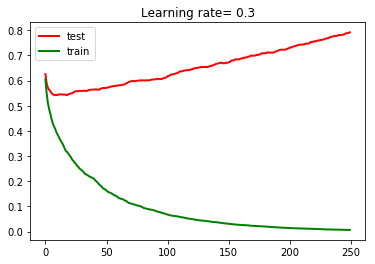

Min metric value= 0.542314111002 

Min metric index= 10 

learning_rate =  0.2 

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.70s
         2           1.1715           13.52s
         3           1.1009           14.49s
         4           1.0529           14.21s
         5           1.0130           13.62s
         6           0.9740           13.83s
         7           0.9475           13.57s
         8           0.9197           13.64s
         9           0.8979           13.26s
        10           0.8730           13.37s
        20           0.7207           11.82s
        30           0.6055           10.93s
        40           0.5244           10.36s
        50           0.4501           10.00s
        60           0.3908            9.80s
        70           0.3372            9.37s
        80           0.3009            9.05s
        90           0.2603            8.45s
       100           0.2327            7.80s
       200        

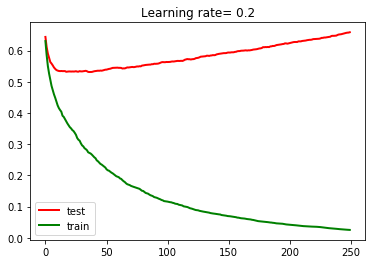

Min metric value= 0.531450796319 

Min metric index= 36 

learning_rate =  0.1 

      Iter       Train Loss   Remaining Time 
         1           1.3199           17.93s
         2           1.2645           18.35s
         3           1.2170           17.78s
         4           1.1775           16.48s
         5           1.1404           16.37s
         6           1.1106           16.19s
         7           1.0844           15.73s
         8           1.0617           15.12s
         9           1.0411           15.08s
        10           1.0223           15.12s
        20           0.8864           13.36s
        30           0.7844           12.39s
        40           0.7176           12.21s
        50           0.6590           11.59s
        60           0.6120           10.83s
        70           0.5599           10.07s
        80           0.5242            9.36s
        90           0.4829            8.72s
       100           0.4473            8.06s
       200        

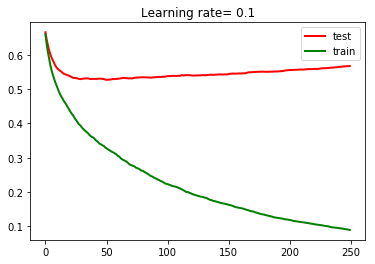

Min metric value= 0.526920187228 

Min metric index= 51 



In [8]:
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    print 'learning_rate = ', i, '\n'
    
    clf = GradientBoostingClassifier(learning_rate=i, n_estimators=250, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    
    test_loss=loss(clf, X_test, y_test)
    train_loss=loss(clf, X_train, y_train)
    plot_clf(i, test_loss, train_loss)
    
    min_metric = min(test_loss)
    min_metric_i = test_loss.index(min_metric)
    print 'Min metric value=', min_metric, '\n'
    print 'Min metric index=', min_metric_i, '\n'

Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

-очевидно, что оверфитинг

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(random_state=241, n_estimators = 36)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
print round(log_loss(y_test, y_pred), 2)

0.54
